# Data Preparation

In [1]:
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib as mpl
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (10,5)

In [2]:
df=pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [3]:
ListofVariables=df.columns
print(ListofVariables)

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')


Data Cleansing

In [4]:
##Investigate why the DAILY_STRESS column is described as an object
df['DAILY_STRESS'].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/2000'], dtype=object)

In [5]:
##Remove row where DAILY_STRESS Dtype is a string
##Convert DAILY_STRESS column to a numeric data type
df=df.loc[df['DAILY_STRESS']!='1/1/2000']
df['DAILY_STRESS']=df['DAILY_STRESS'].astype('int')

In [6]:
##Check DAILY_STRESS dtype
df['DAILY_STRESS'].dtypes

dtype('int32')

In [7]:
##Remove the time from Timestamp column to show dates only
df['Timestamp']=pd.to_datetime(df['Timestamp']).dt.year
df['Timestamp']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
15967    2021
15968    2021
15969    2021
15970    2021
15971    2021
Name: Timestamp, Length: 15971, dtype: int64

In [8]:
##Replace the age group text "Less than 20" with text "20 or less" for proper order in graphs
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')

# Descriptive Analysis

Who are the respondents? Let's investigate the survey respondents to see "who" they are by examining the percentage of respondents in regard to gender, age, and work-life balance scores.

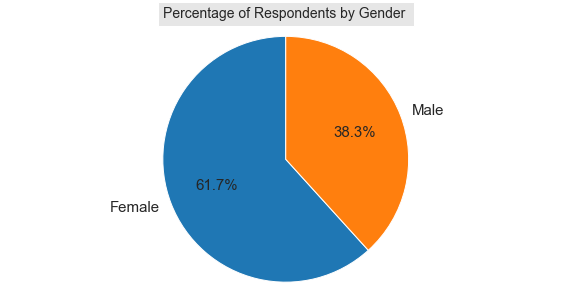

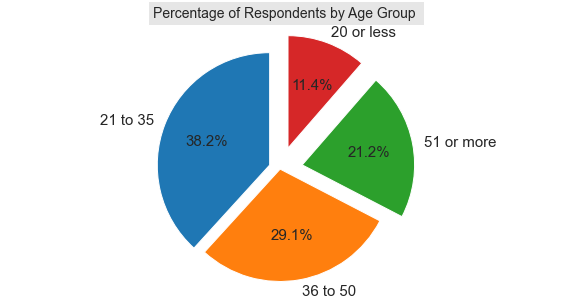

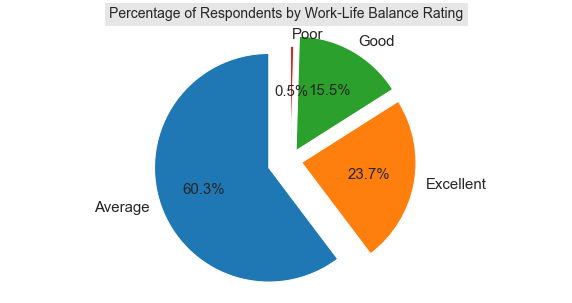

In [9]:
##Use pie charts to see the percentage of respondents by gender, age group, and work-life balance score 
##Group work life balance scores into bins in order to rate the scores as poor, average, good, or excellent based on scores

plt.figure(0)
gender_data=(df['GENDER'].value_counts()*100)/(df.shape[0])
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%',shadow=False, startangle=90,textprops={'fontsize': 15})
plt.title('Percentage of Respondents by Gender ',bbox={'facecolor':'0.9', 'pad':5}, loc='center', size=14)
plt.axis('equal')


plt.figure(1)
age_data=(df['AGE'].value_counts()*100)/(df.shape[0])
explode_group=(.1, 0, .2, .2)
plt.pie(age_data, labels=age_data.index, explode=explode_group, autopct='%1.1f%%',shadow=False, startangle=90,textprops={'fontsize': 15})
plt.title('Percentage of Respondents by Age Group ',bbox={'facecolor':'0.9', 'pad':5}, loc='center', size=14)
plt.axis('equal')


plt.figure(2)
bins=[0,549,680,700,850]
rating=['Poor','Average','Good','Excellent']
df['wlbs_binned']=pd.cut(df['WORK_LIFE_BALANCE_SCORE'], bins,labels=rating)
df.head()
wlbsbinned_data=(df['wlbs_binned'].value_counts()*100)/(df.shape[0])
explode_bins=(.2, .1,.1, 0)
plt.pie(wlbsbinned_data, labels=wlbsbinned_data.index, explode=explode_bins, autopct='%1.1f%%',shadow=False, startangle=90,textprops={'fontsize': 15})
plt.title('Percentage of Respondents by Work-Life Balance Rating',bbox={'facecolor':'0.9', 'pad':5}, loc='center', size=14)
plt.axis('equal')


plt.show()


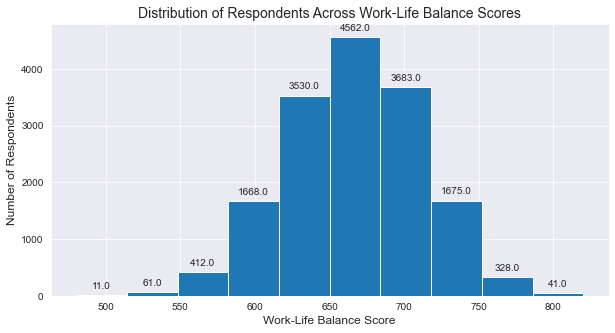

In [10]:
##Plot a histogram to show the number of people who scored within the respective work-life balance score ranges
splot=df['WORK_LIFE_BALANCE_SCORE'].hist()
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Distribution of Respondents Across Work-Life Balance Scores', size=14)
plt.xlabel('Work-Life Balance Score', size=12)
plt.ylabel('Number of Respondents', size=12)
plt.show()

The majority of the survey respondents are females, between the ages of 21 and 50, and reported an average work-life balance score based on the variables in the dataset.  The majority of the respondents reported a work-life balance score between 620 and 680 in a pretty normally distributed histogram.

In this section of Descriptive Analysis, we will investigate the relationship between the Work-Life Balance Scores and  uncontrollable factors such as gender, age, and year of survey respondence.

<Figure size 720x360 with 0 Axes>

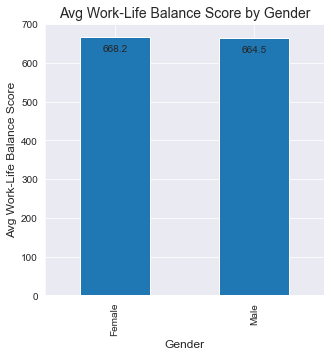

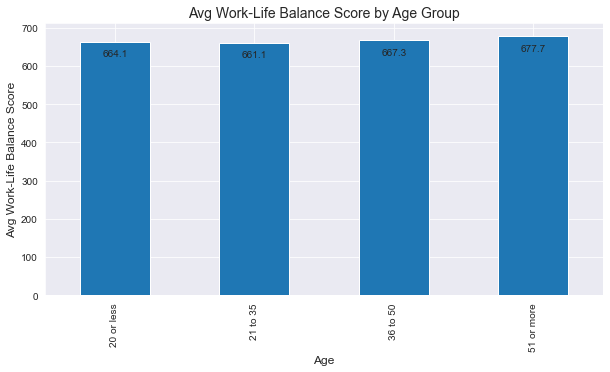

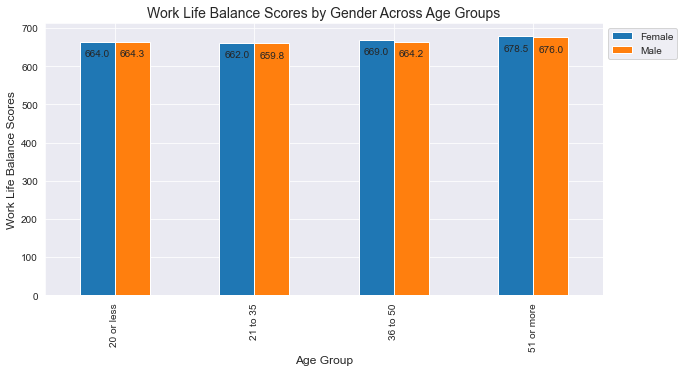

In [11]:
##Discover whether males or females have a higher average work-life balance score
##Analyze the average work-life balance score based on age group
##Show the Work-Life Balance Scores across Gender and Age 

plt.figure(0)
df_gender = df.groupby('GENDER').mean()['WORK_LIFE_BALANCE_SCORE']
plt.figure(figsize=(5, 5))
splot=df_gender.plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Avg Work-Life Balance Score by Gender', size=14)
plt.xlabel("Gender", size=12)
plt.ylabel("Avg Work-Life Balance Score", size=12)

plt.figure(1)
df_age = df.groupby('AGE').mean()['WORK_LIFE_BALANCE_SCORE']
plt.figure(figsize=(10, 5))
splot2=df_age.plot(kind='bar')
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Avg Work-Life Balance Score by Age Group', size=14)
plt.xlabel("Age", size=12)
plt.ylabel("Avg Work-Life Balance Score", size=12)

plt.figure(2)
gender_age=df.pivot_table(values='WORK_LIFE_BALANCE_SCORE',index='AGE', columns='GENDER')
gender_age.head()
splot3=gender_age.plot(kind='bar')
for p in splot3.patches:
    splot3.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title('Work Life Balance Scores by Gender Across Age Groups', size=14)
plt.xlabel('Age Group', size=12)
plt.ylabel('Work Life Balance Scores', size=12)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.show()

The demographical data collected in the survey included the age and gender of the respondents.  From the descriptive analysis, it appears that age and gender do not significantly affect work-life balance.  The average work-life balance scores do not vary much across gender nor across age group.  Neither does it vary significantly across gender within different age groups.  Nonetheless, women and older people have a slightly higher work-life balance score overall.  Though the scores do not vary much across age nor gender, older women, in particular, have the highest work-life balance scores.  

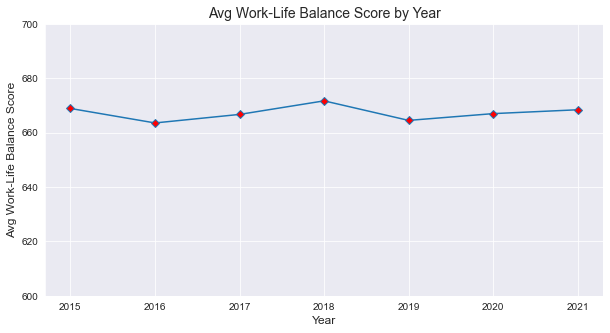

In [12]:
##How can I show marker annotations in a line graph?
##How to set y axis limits

##Analyze Work-Life Balance Scores over the years of survey respondence  
df_year = df.groupby('Timestamp').mean()['WORK_LIFE_BALANCE_SCORE']
plt.figure(figsize=(10, 5))
line=df_year.plot(kind='line', marker="D", mfc='red')
plt.title('Avg Work-Life Balance Score by Year', size=14)
plt.xlabel("Year", size=12)
plt.ylabel("Avg Work-Life Balance Score", size=12)
plt.ylim(600,700)
plt.show()


In the midst of the Covid-19 global pandemic of 2020, it would be interesting to see if there were any drastic changes in the average work-life balance scores during times of such global economic uncertainty.  The analysis of Work-Life Balance Scores aross the years the survey was taken shows the largest variation of work-life balance score of 8.4 points.  This discovery could suggest that overall and/or in general, a global pandemic may not have a significant affect on work-life balance.  

After investigating the uncontrollable factors of gender, age, and year of the survey, we find that these three factors in particular have little variation between values when in relationship to work-life balance scores and seem to have no influence over an individual's overall score.

Next, we will use more Descriptive Analysis to explore the relationship between Work-Life Balance and the variables related to productivity and expertise within the dataset.  

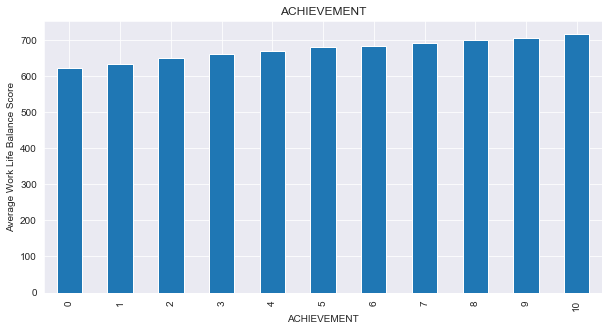

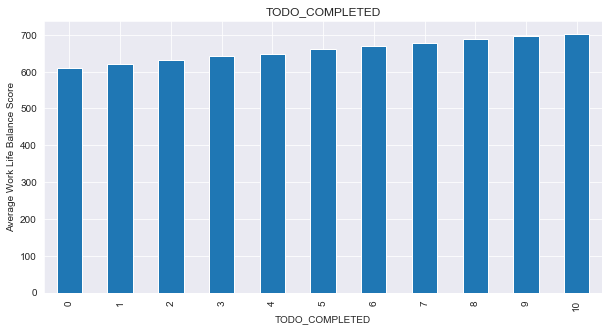

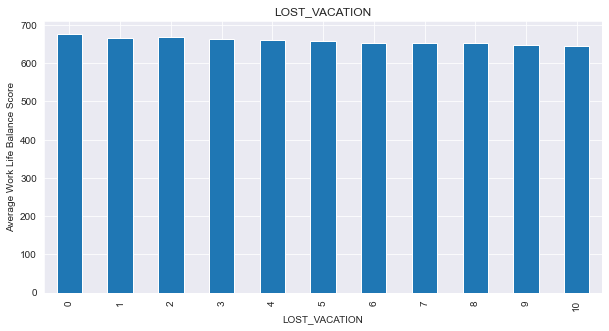

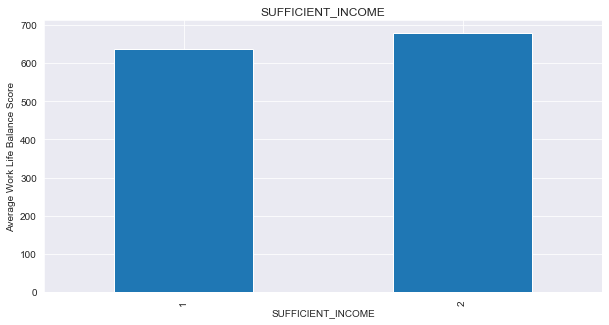

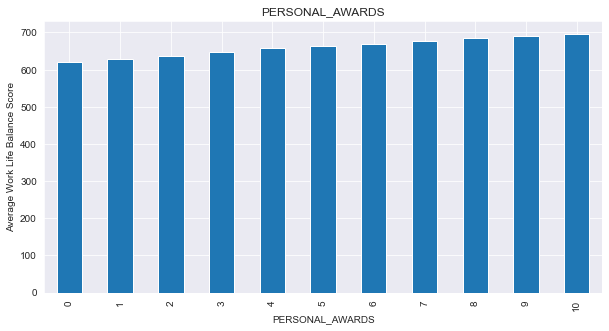

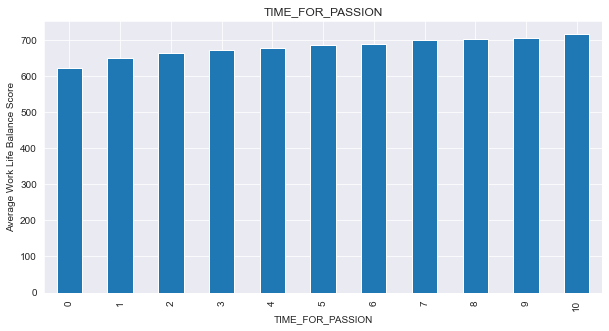

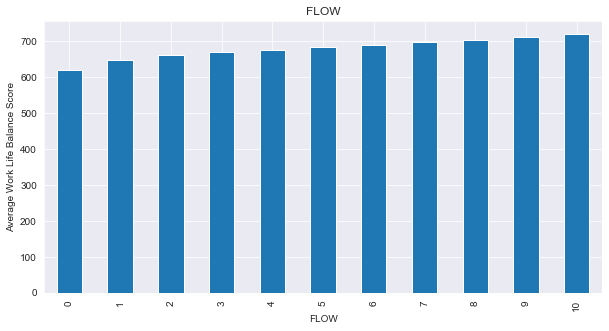

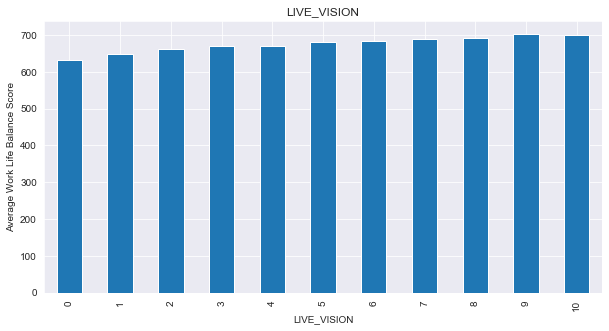

In [13]:
ListOfWorkVariables=['ACHIEVEMENT', 'TODO_COMPLETED','LOST_VACATION','SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'FLOW', 'LIVE_VISION']
for item in ListOfWorkVariables:
    ax = df.groupby(item).mean()['WORK_LIFE_BALANCE_SCORE'].plot(kind='bar') #Looping through every item in the dataframe. 
    plt.ylabel('Average Work Life Balance Score')
    plt.title(item)
    plt.show()

As acheivement, productivity, personal rewards, time for passion, flow, and life vision increase, so does the work-life balance score.  The work-life balance score also increases as income sufficiency increases but not by as much as the aforementioned variables.  As the amount of vacation time that is lost increases, the work-life balance score decreases to some degree, but not by a considerable amount of points. This analysis of expertise and work related variables which are categorized as productivity and expertise suggests that as a person's productivity and their ability to focus and create something unique increases so does their work-life balance score increase and that these variables are important influencers of work-life balance. 

This section of the Descriptive Analysis explores the relationship between Work-Life Balance and the variables related to a person's lifestyle choices within the dataset.  

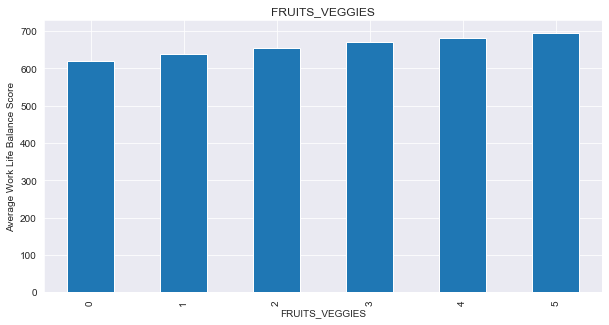

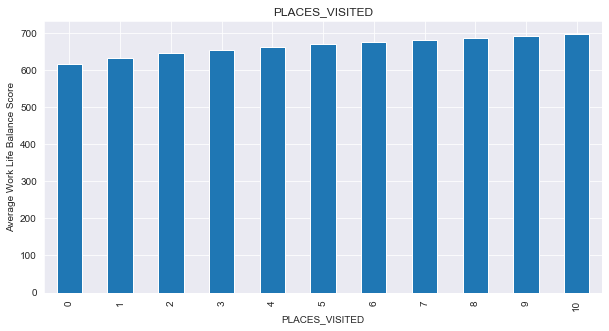

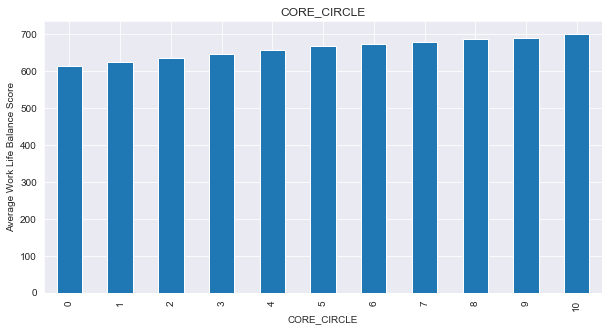

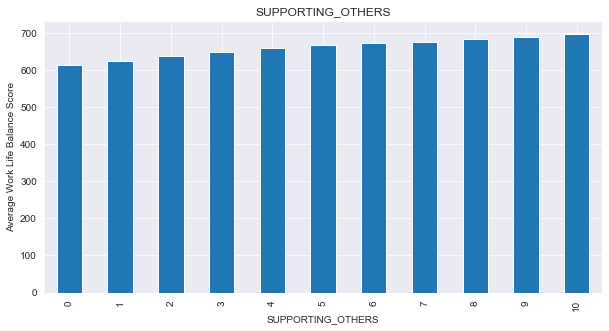

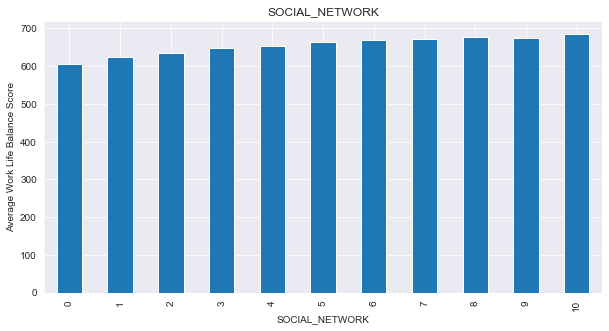

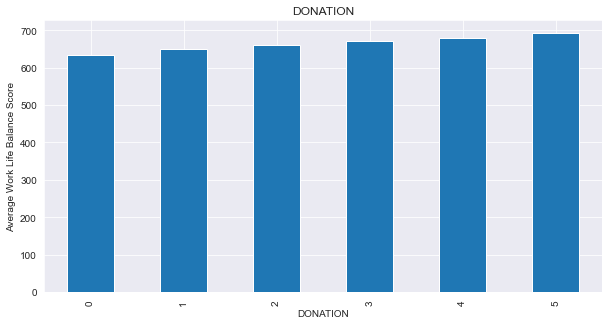

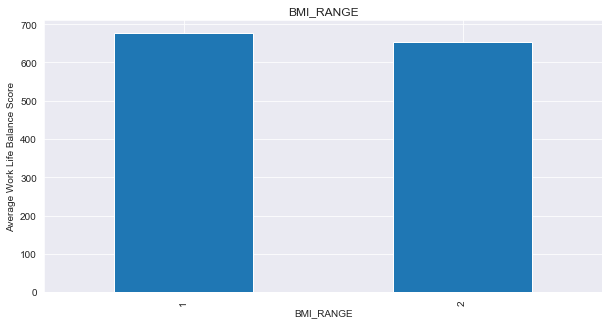

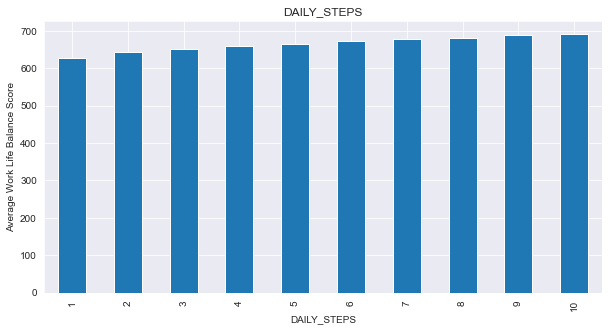

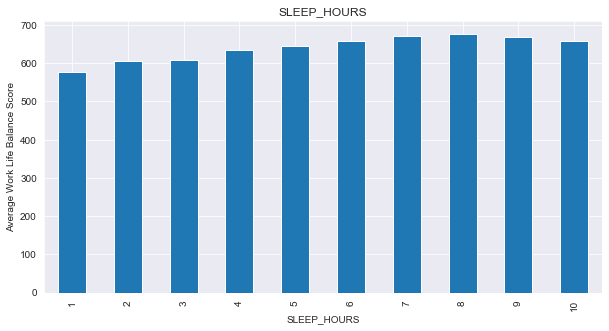

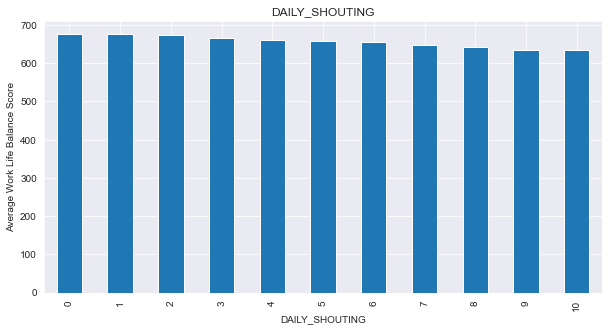

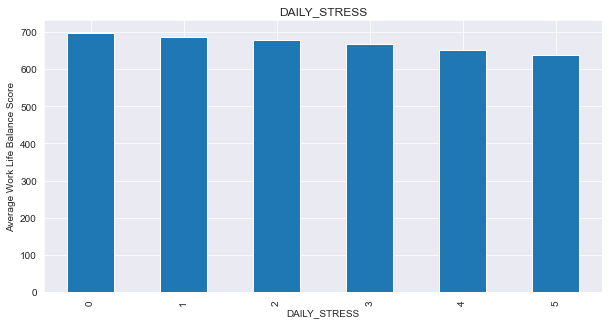

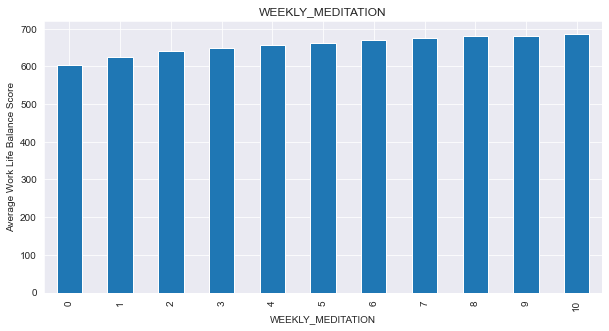

In [14]:
ListOfLSVariables=['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'DONATION',
       'BMI_RANGE', 'DAILY_STEPS',
       'SLEEP_HOURS', 'DAILY_SHOUTING', 'DAILY_STRESS','WEEKLY_MEDITATION']
for item in ListOfLSVariables:
    ax1 = df.groupby(item).mean()['WORK_LIFE_BALANCE_SCORE'].plot(kind='bar') #Looping through every item in the dataframe. 
    plt.ylabel('Average Work Life Balance Score')
    plt.title(item)
    plt.show()


The data suggests that the healthier a person's lifestyle choices are and the more connected they are to others, the higher a person's work-life balance score.  An increase in the variables regarding health and connectedness ('FRUITS_VEGGIES', 'DAILY_STEPS', 'WEEKLY_MEDITATION', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'DONATION') correlates to a higher work-life balance score.  Interestingly enough, a person's work-life balance increases as the amount of hours of person sleeps increases, but only up to a certain amount of sleep hours. It seems that if a person is sleeping more than 8 hours, then there is a slight decrease in the work-life balance score. The work-life balance score also decreases as the amount of unhealthy habits increase such as daily stress, daily shouting, and body mass index.
       

# Inferential Analysis

An inferential analysis of the dataset is used to discover which variables are most closely correlated to the Work-Life Balance Score and determine which of these variables are most statistically significant.  Additionally, an OLS Regression Model is created to test the hypothesis and model predicitons of the Work-Life Balance Score.

In [15]:
##Change remaining object datatypes to numbers
df['GENDER'] = df['GENDER'].replace({'Female':0, 'Male':1})
df['AGE'] = df['AGE'].replace({'20 or less':0, '21 to 35':1, '36 to 50':2, '51 or more':3})

<AxesSubplot:>

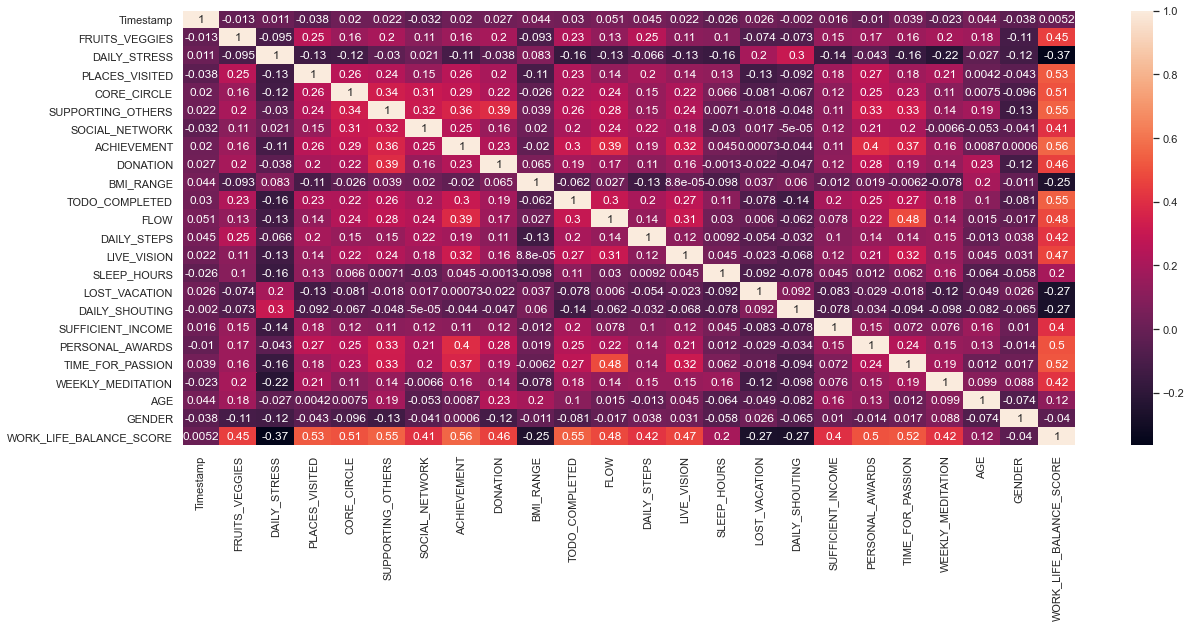

In [16]:
##Show correlation for all variables with a heatmap
corr_df=df.corr()
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(corr_df, annot=True)

Insights

DAILY_STRESS              -0.365399
DAILY_SHOUTING            -0.273143
LOST_VACATION             -0.266318
BMI_RANGE                 -0.252026
GENDER                    -0.039911
Timestamp                  0.005168
AGE                        0.119958
SLEEP_HOURS                0.196420
SUFFICIENT_INCOME          0.403554
SOCIAL_NETWORK             0.412580
WEEKLY_MEDITATION          0.416229
DAILY_STEPS                0.422981
FRUITS_VEGGIES             0.452256
DONATION                   0.458825
LIVE_VISION                0.471319
FLOW                       0.478218
PERSONAL_AWARDS            0.504225
CORE_CIRCLE                0.507594
TIME_FOR_PASSION           0.516979
PLACES_VISITED             0.529673
TODO_COMPLETED             0.545503
SUPPORTING_OTHERS          0.548854
ACHIEVEMENT                0.561241
WORK_LIFE_BALANCE_SCORE    1.000000
Name: WORK_LIFE_BALANCE_SCORE, dtype: float64


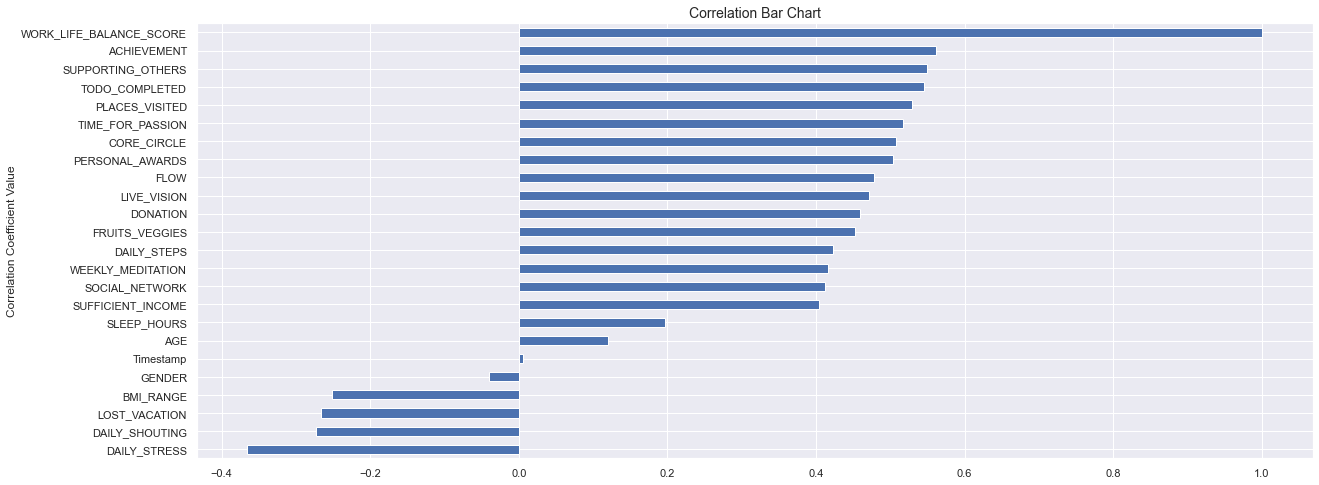

In [22]:
##Show correlation to Work Life Balance Score for each variable in descending order
selection=corr_df['WORK_LIFE_BALANCE_SCORE'].sort_values(ascending=True)
print(selection)
selection.plot(kind="barh")
plt.title('Correlation Bar Chart', size=14)
plt.ylabel('Correlation Coefficient Value', size=12)
plt.show()

In [18]:
##Create a multivariate linear regression model while dropping variables that are not as strongly correlated to the 
##Work-Life Balance Score (with correlation coefficient values between -0.4 and 0.4) in an effort 
##to reduce the degree of multicollinearity in the model

import statsmodels.api as sm
ListofRVariables=df[['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION','SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION','WEEKLY_MEDITATION']]
dependent_variables=df['WORK_LIFE_BALANCE_SCORE']
independent_variables=ListofRVariables
independent_variables=sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variables,independent_variables).fit() 
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.908
Model:                                 OLS   Adj. R-squared:                  0.908
Method:                      Least Squares   F-statistic:                 1.056e+04
Date:                     Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                             22:05:13   Log-Likelihood:                -64372.
No. Observations:                    15971   AIC:                         1.288e+05
Df Residuals:                        15955   BIC:                         1.289e+05
Df Model:                               15                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               499.6433      0.537    930.534      0.000     498.591     500.696
FRUITS_VEGGIES        4.0464      0.082     49.629      0.000       3.887       4.206
PLACES_VISITED        2.3247      0.036     64.073      0.000       2.254       2.396
CORE_CIRCLE           2.1555      0.043     50.160      0.000       2.071       2.240
SUPPORTING_OTHERS     1.3975      0.041     34.398      0.000       1.318       1.477
SOCIAL_NETWORK        1.2868      0.039     32.881      0.000       1.210       1.364
ACHIEVEMENT           1.6362      0.048     34.065      0.000       1.542       1.730
DONATION              2.8427      0.065     43.586      0.000       2.715       2.971
TODO_COMPLETED        2.3579      0.047     50.458      0.000       2.266       2.450
FLOW                  1.4921      0.055     26.893      0.000       1.383       1.601
DAILY_STEPS           2.2180      0.040     55.418      0.000       2.140       2.296
LIVE_VISION           1.7740      0.037     47.714      0.000       1.701       1.847
SUFFICIENT_INCOME    19.1582      0.253     75.792      0.000      18.663      19.654
PERSONAL_AWARDS       1.4223      0.040     35.355      0.000       1.343       1.501
TIME_FOR_PASSION      1.9734      0.048     41.134      0.000       1.879       2.067
WEEKLY_MEDITATION     2.4651      0.038     64.859      0.000       2.391       2.540
==============================================================================
Omnibus:                      325.017   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.765
Skew:                          -0.324   Prob(JB):                     4.96e-71
Kurtosis:                       2.740   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Predictions

In [19]:
df['Prediction'] = pd.DataFrame(regression_model.predict(independent_variables))
df[['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION','SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION','WEEKLY_MEDITATION','WORK_LIFE_BALANCE_SCORE',
       'Prediction']].head()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE,Prediction
0,3,2,5,0,5,2,0,6,4,5,0,1,4,0,5,609.5,605.294333
1,2,4,3,8,10,5,2,5,2,5,5,2,3,2,6,655.6,657.469461
2,2,3,4,4,10,3,2,2,2,4,5,2,4,8,3,631.6,645.013390
3,3,10,3,10,7,2,5,3,5,5,0,1,5,2,0,622.7,637.804153
4,5,3,3,10,4,2,4,5,0,5,0,2,8,1,5,663.9,653.953780


In [20]:
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import math
rmse=math.sqrt(mean_squared_error(df['WORK_LIFE_BALANCE_SCORE'],df['Prediction']))
normalized_rmse=rmse/(df['Prediction'].max()-df['Prediction'].min())
print(normalized_rmse)

0.049277413304975044


With an Rsquared value of 0.908 and a Normalized Root Mean Squared value of 0.049, this regression model, with variables having a correlation value between 0.4 and -0.4 removed, proves to be a good fit for the data and indicates a high degree of accuracy when predicting certain work-life balance scores based on survey responses.  


Key Insights:
<br>-There are certain variables that have more of an influence over the work-life balance score than other variables; the top half of the variables that are most closely correlated to the work-life balance score, date of the survey excluded, are evenly distributed between variables related to work and expertise and variables related to lifestyle. 
<br>-Uncontrollable variables such as gender, age, and year do not seem to have a high correlation to work-life balance score.
<br>-Each variable included within the OLS model is statistically significant to the work-life balance
<br>-Work-Life Balance score is most highly influenced by a person's Achievement, Support to Others, Productivity, Number of Places Visited, and Time for Passion, in this order.
<br>-Employers can help employees achieve a higher work life balance by implementing initiatives supporting the top 5 drivers of work-life balance score such as: 
    <br>&nbsp;&nbsp;&nbsp;&nbsp;-Boost employee sense of achievement by helping them set and reach attainable goals
    <br>&nbsp;&nbsp;&nbsp;&nbsp;-Creating a co-worker mentorship program to provide an opportunity to support others
    <br>&nbsp;&nbsp;&nbsp;&nbsp;-Allowing flexible work schedules to help employees increase professional and personal productivity
    <br>&nbsp;&nbsp;&nbsp;&nbsp;-Host employer meetings or sponser employee events at different venues around town they are passionate about as a way to increase time for passion